 ## Part 3: 似然与最大似然 (Maximum Likelihood)

在现实中，我们很少知道疾病在人群中的患病率$θ$。

因此，我们的目的就是估计这些参数（患病率$θ$），估计这些参数也是统计建模的主要重点。


频率学派估计模型参数最常用的方法为最大似然法（Maximum Likelihood）。（其实我们心理统计的大多数方法都可以视作模型，而我们想要估计的均值和均值差异等统计量，就是模型中的参数，因此我们对这个估计过程并不陌生）。

极大似然估计的原理很简单
- 首先，假设一个参数的可能性，即假设模型参数值为多少。
- 然后，根据数据样本推测该参数的最大可能性，通过变化参数，看在那个参数下，样本数据最有可能出现。

### 3.1 Estimating disease prevalence via Maximum Likelihood

回到估计患病率的例子。

假设在100个人的随机样本中，有10人是疾病阳性。

- 我们可以本能的做出假设：人患病的可能性为$0.1 = 100/10$
- 但我们可以进行怀疑，在其他患病率条件下，比如 $\theta = {0.05,0.2,0.5,0.8}$的时候，100人中出现10人阳性的可能为多少。
我们可以做一些尝试，找到使得可能性最大的参数值。

比如，我们假设患病率参数$\theta=0.1$ （根据我们直觉得到，后续我们可以假设其他值），加上我们获取的数据 总人数$n=100$，阳性患者人数 $\beta=10$。

再根据的二项分布公式 $\operatorname{Pr}(\beta,n \mid \theta) = \binom{\beta}{n} \theta^{\beta}(1-\theta)^{n-\beta}$，可以计算得到 $\operatorname{Pr}(10, 100 \mid 0.1) = 0.13 =   \binom{10}{100}0.1^{10}(1-0.1)^{100-10}$，说明我们假设的可能性为 0.13。

In [2]:
# 通过代码进行计算
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, bernoulli
from scipy import stats

# 函数对应前文的二项分布公式 binom.pmf(β,n,θ)，
# 带入影响参数β,n,θ可计算得到我们假设参数θ出现的可能性
theta = 0.1
beta = 10
n = 100
L = binom.pmf(beta,n,theta)
print(f"假设Θ为{theta}条件下，100人中有10人患病的可能性为：{L}")

假设Θ为0.1条件下，100人中有10人患病的可能性为：0.13186534682448794


我们已经完成了最大似然的第一步，通过假设参数值估计在当前数据下参数出现的可能性。

🧐现在我们进行第二个步骤，通过一些尝试，找到使得L最大的参数。比如假设 $\theta = {0.05,0.2,0.5,0.8}$，看此时假设成立可能性的变化。

In [ ]:
######################################################
# 练习阶段
######################################################
theta = ... # 请尝试不同的 θ假设
beta = 10
n = 100
L = binom.pmf(beta,n,theta)
print(f"假设Θ为{theta}条件下，100人中有10人患病的可能性为：{L}")

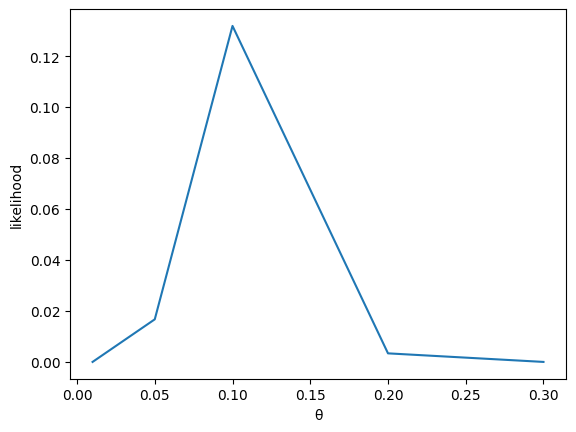

In [6]:
# 尝试画出不同θ条件下的似然值
theta = [0.01,0.05,0.1,0.2,0.3]
beta = 10
n = 100
L = binom.pmf(beta,n,theta)

fig, ax = plt.subplots()
ax.plot(theta,L)
plt.xlabel("θ")
plt.ylabel("likelihood")
plt.show()

In [ ]:
######################################################
# 练习阶段
# 尝试画出更多不同参数条件下似然的变化
######################################################
theta = ... # 请尝试不同的θ值
beta = 10
n = 100
L = binom.pmf(beta,n,theta)

fig, ax = plt.subplots()
ax.plot(theta,L)
plt.xlabel("θ")
plt.ylabel("likelihood")
plt.show()

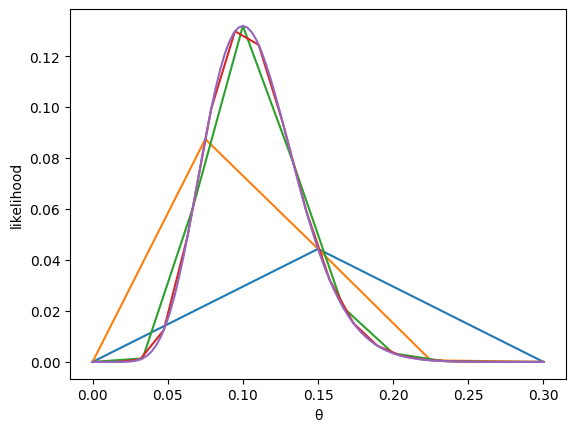

In [11]:
# 随着参数越来越多，我们可以发现一些规律
k = [3,5,10,20,100]

fig, ax = plt.subplots()
for i in k:
  theta = np.linspace(0,0.3,i)
  beta = 10
  n = 100
  L = binom.pmf(beta,n,theta)
  
  ax.plot(theta,L)
plt.xlabel("θ")
plt.ylabel("likelihood")
plt.show()

如果我们尝试（遍历）所有参数$\theta$的值，我们可以画参数$\theta$和假设可能性$L$的关系。

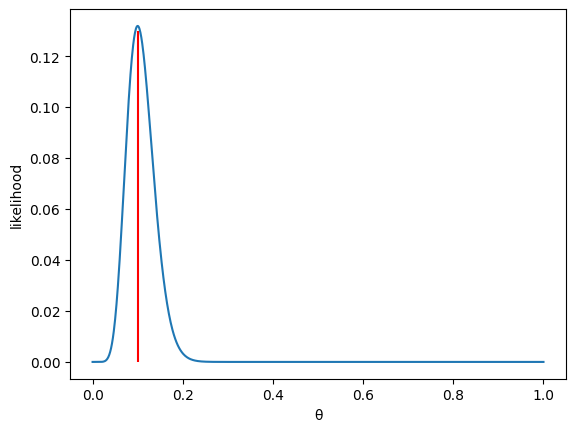

In [5]:
theta = np.linspace(0,1,1000) # 设置θ为0到1的1000个数
L = binom.pmf(beta,n,theta)

fig, ax = plt.subplots()
ax.plot(theta,L)
ax.vlines(0.1,ymin=0,ymax=0.13,color="red")
plt.xlabel("θ")
plt.ylabel("likelihood")
plt.show()

可以看到，当$\theta$为0.1时，该参数出现的可能性最大，这验证了我们的假设。

通过尝试各种参数寻找可能性最大的那个参数，这就是 **最大似然估计**。
- 与通过一次计算（求平均值）得到参数不同，最大似然估计强调去尝试更多的可能性
- 结合参数与数据计算的可能性$L$，就是似然值（Likelihood），我们的目的就是找到最大似然值所对应的参数
- 最大似然估计的关键在于似然函数，只有知道似然函数，才能计算似然值
- 最大似然估计的过程是在固定数据$\beta,n$的条件下变化参数$\theta$

根据以上特性，似然函数的公式可以写作 $\operatorname{L}(\theta \mid \beta,n ) = \binom{n}{\beta} \theta^{\beta}(1-\theta)^{n-\beta}$，最大似然估计可以表达为 $\theta^*= arg\max_{\theta}\operatorname{L} =arg\max_{\theta}Pr(\beta,n|\theta)$

### 3.2 Maximum likelihood 的真实计算过程

- 获取实验数据，比如，100中有10人患病。
- 确定似然函数，比如二项分布函数$\operatorname{L}(\theta \mid \beta,n ) = \binom{n}{\beta} \theta^{\beta}(1-\theta)^{n-\beta} = \binom{100}{10} 0.1^{10}(1-0.1)^{100-10} = 0.13$。
- 通过对数log将似然函数中的连乘变为求和，比如 $log(\theta^{\beta}(1-\theta)^{n-\beta}) = log(\theta^{\beta}) + log((1-\theta)^{n-\beta})$, $log(0.1^{10}(1-0.1)^{100-10}) = log(0.1^{10}) + log((1-0.1)^{100-10}) = -23.03 + -9.48 = -32.51$。
- 对似然函数求导（微分）以获取最大似然。在前文图中的演示里我们发现，最大似然对应的参数值 $\theta = 0.13$（红色线）即为分布的峰部（peak），因此可以通过求导的方式计算出峰部的位置，即参数的估计值。[演示](https://rpsychologist.com/likelihood/)

### Maximum Likelihood的推断过程

很容易发现，最大似然估计是一个点估计的过程，即我们通过最大似然值，找到最符合数据的参数值$\theta$。

这与我们之前学心理统计时的统计方法相似，比如单样本t检验中估计样本在总体的位置，或者回归模型中估计参数$\beta$。

但这个方法好像与我们现在学习的贝叶斯方法并不相同，因为这个方法的主角并不是概率分布，而是似然函数。

另一个需要注意的问题是，同频率学派的其他方法容易受到极端值的影响一样，通过似然函数的推断也容易受到采样误差的影响 （因为，极大似然估计的过程是固定数据不变，变化的参数值）。

为了进一步确定最大似然估计的准确性，频率学派采取调查似然函数曲率的方式确定最大似然估计的准确性。

如图：
![Image Name](https://cdn.kesci.com/upload/image/ri8tjni0ka.png?imageView2/0/w/960/h/960)

如果似然在最大似然估计附近**快速的**达到峰值(见图中的黑线)，那么这表明只有一小范围的参数可以产生相似的似然值。在这种情况下，我们对参数估计会有更多的信心。

相比之下，如果似然在最大似然估计值的附近**平缓地**达到峰值(见图4.8中的红线)，那么一个大范围的参数值可以产生相似的似然值。我们对该估计就不那么有信心了。



### Summary

- 似然（likelihood）和概率（probability）的区别
	- 概率（probability）：参数固定，数据不固定
	- 似然（likelihood）：数据固定，参数不固定
- 最大似然估计（maximum likelihood）
	- 频率学派的点估计方法
	- 通过似然函数的曲率（curvature）评估估计的准确性（certainty）
	- 不是有效的概率分布（probability distribution）

如何获得有效的概率分布进行推断，而不只是基于似然函数进行推断。

我们需要贝叶斯公式，通过贝叶斯公式（结合先验经验）把似然函数转化为概率分布。